<a href="https://colab.research.google.com/github/rkcoder7/Data-analysis-Basic/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

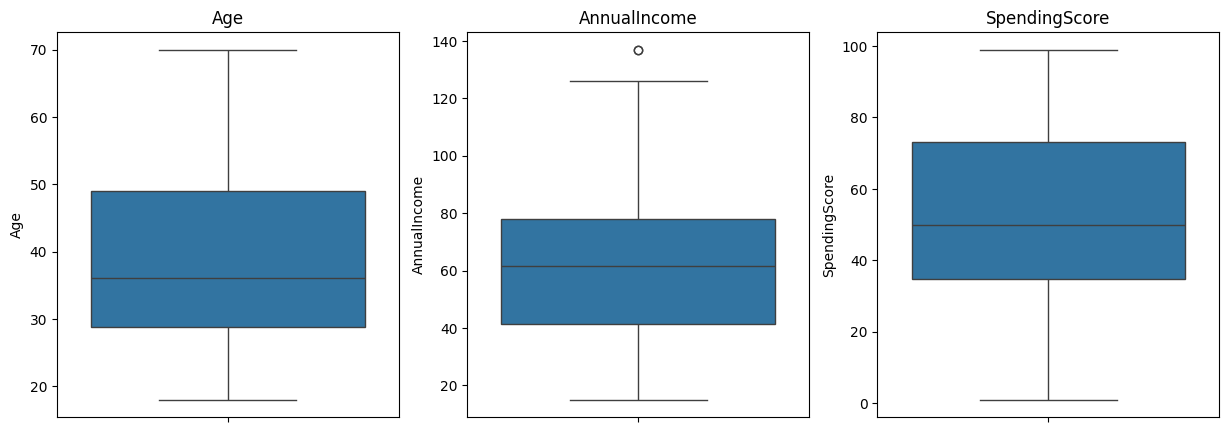

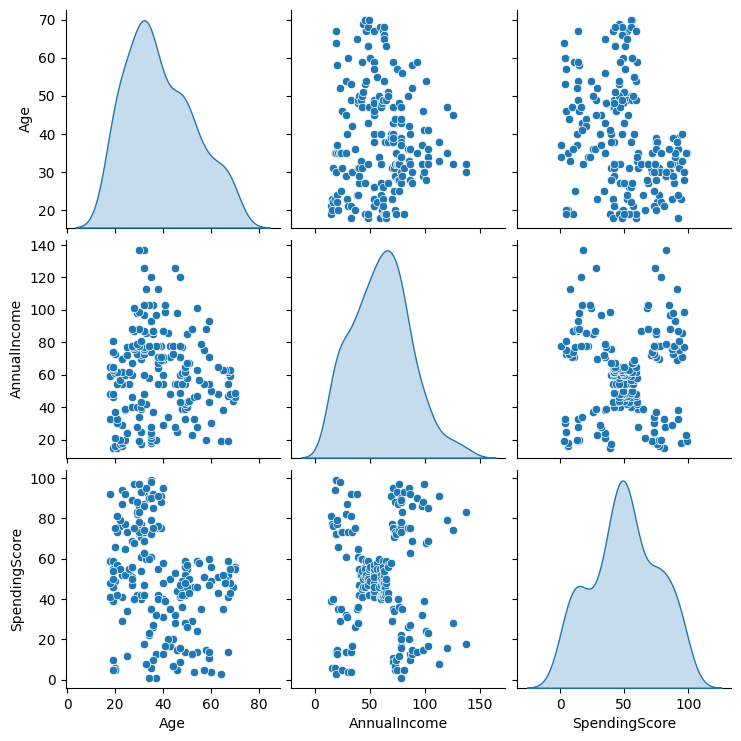

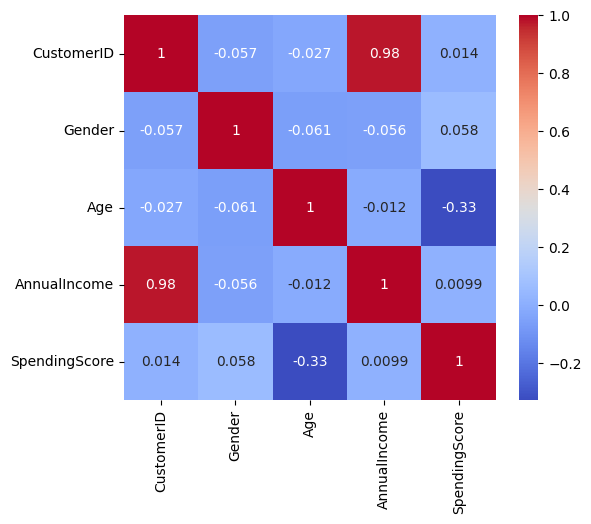

   CustomerID  Gender  Age  AnnualIncome  SpendingScore     Age_s  Income_s  \
0           1       0   19            15             39 -1.424569 -1.738999   
1           2       0   21            15             81 -1.281035 -1.738999   
2           3       1   20            16              6 -1.352802 -1.700830   
3           4       1   23            16             77 -1.137502 -1.700830   
4           5       1   31            17             40 -0.563369 -1.662660   

    Score_s  
0 -0.434801  
1  1.195704  
2 -1.715913  
3  1.040418  
4 -0.395980  


In [ ]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP 2: LOAD DATA (working raw URL)
url = "https://raw.githubusercontent.com/DataMinati/Datasets-/master/Mall_Customers.csv"
data = pd.read_csv(url)

# STEP 3: INITIAL EXPLORATION
print(data.head())
print(data.info())
print(data.describe())

# STEP 4: CLEAN DATA
print("Missing values:\n", data.isnull().sum())
print("Duplicates count:", data.duplicated().sum())

# STEP 5: RENAME COLUMNS & ENCODE CATEGORICALS
data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# STEP 6: VISUALIZE OUTLIERS
plt.figure(figsize=(15,5))
for i, col in enumerate(['Age','AnnualIncome','SpendingScore'], 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.show()

# STEP 7: DISTRIBUTIONS & CORRELATION
sns.pairplot(data[['Age','AnnualIncome','SpendingScore']], diag_kind='kde')
plt.show()
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# STEP 8: FEATURE SCALING
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data[['Age','AnnualIncome','SpendingScore']])
scaled_df = pd.DataFrame(scaled, columns=['Age_s','Income_s','Score_s'])
final = pd.concat([data, scaled_df], axis=1)

print(final.head())

# STEP 9: SAVE CLEAN DATA (Optional)
final.to_csv("Cleaned_Mall_Customers.csv", index=False)
